<a href="https://colab.research.google.com/github/danieladoghe/AI-projects-/blob/main/Stock_Market_Prediction_using_LSTM_(Baseline_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
file_path = '/content/stock_yfinance_data (1).csv'  # Update this to your actual file path
stock_data = pd.read_csv(file_path)
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [ ]:
tesla_data = stock_data.head(252)

In [ ]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [ ]:
stock_data.set_index('Date', inplace=True)

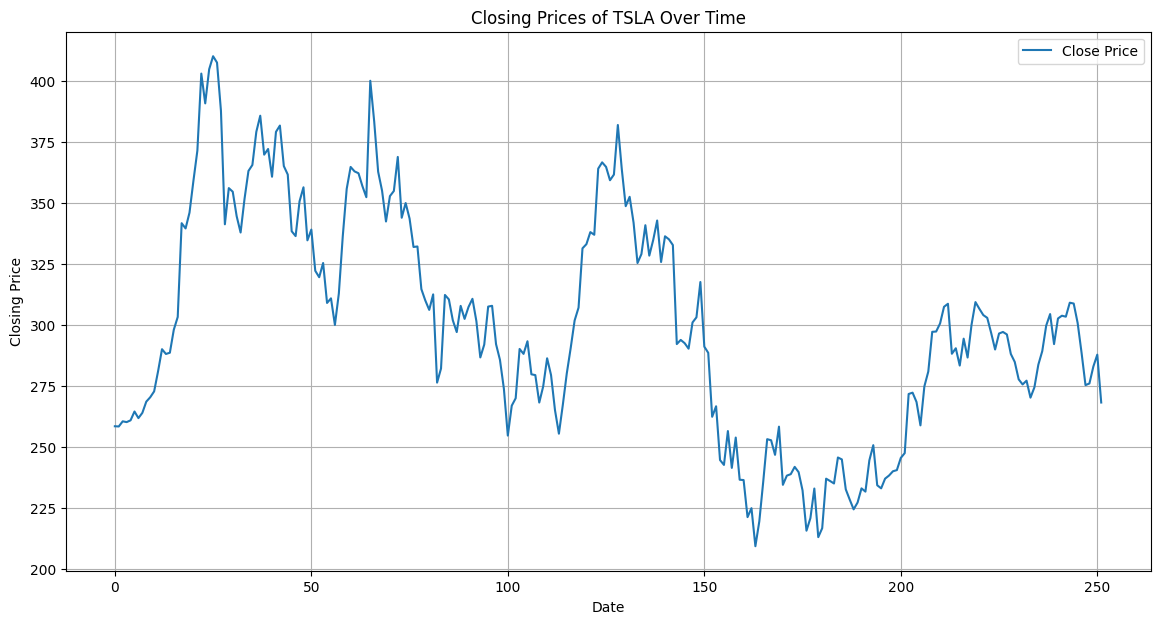

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(tesla_data['Close'], label='Close Price')
plt.title('Closing Prices of TSLA Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(tesla_data.describe())

             Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   300.295542  307.656601  292.253823  299.864947  299.864947   
std     46.161120   46.804121   44.718813   45.812123   45.812123   
min    207.949997  217.973328  206.856674  209.386673  209.386673   
25%    266.860825  273.241661  260.780823  267.203331  267.203331   
50%    298.750000  304.158325  289.565002  296.856659  296.856659   
75%    335.700005  344.957512  327.908340  336.472504  336.472504   
max    411.470001  414.496674  405.666656  409.970001  409.970001   

             Volume  
count  2.520000e+02  
mean   8.058207e+07  
std    2.549115e+07  
min    3.504270e+07  
25%    6.242468e+07  
50%    7.710210e+07  
75%    9.351338e+07  
max    1.885563e+08  


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close_prices = scaler.fit_transform(tesla_data['Close'].values.reshape(-1, 1))

In [ ]:
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        xs.append(data[i:(i + sequence_length)])
        ys.append(data[i + sequence_length])
    return np.array(xs), np.array(ys)

In [ ]:
sequence_length = 60

In [ ]:
X, y = create_sequences(scaled_close_prices, sequence_length)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
5/5 [==============================] - 6s 285ms/step - loss: 0.1138 - val_loss: 0.0224
Epoch 2/10
5/5 [==============================] - 0s 63ms/step - loss: 0.0406 - val_loss: 0.0099
Epoch 3/10
5/5 [==============================] - 0s 57ms/step - loss: 0.0240 - val_loss: 0.0219
Epoch 4/10
5/5 [==============================] - 0s 58ms/step - loss: 0.0263 - val_loss: 0.0207
Epoch 5/10
5/5 [==============================] - 0s 63ms/step - loss: 0.0211 - val_loss: 0.0121
Epoch 6/10
5/5 [==============================] - 0s 58ms/step - loss: 0.0187 - val_loss: 0.0085
Epoch 7/10
5/5 [==============================] - 0s 56ms/step - loss: 0.0193 - val_loss: 0.0112
Epoch 8/10
5/5 [==============================] - 0s 64ms/step - loss: 0.0168 - val_loss: 0.0158
Epoch 9/10
5/5 [==============================] - 0s 61ms/step - loss: 0.0179 - val_loss: 0.0153
Epoch 10/10
5/5 [==============================] - 0s 57ms/step - loss: 0.0159 - val_loss: 0.0105


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
predicted_prices = model.predict(X_test)

2/2 [==============================] - 1s 13ms/step


In [ ]:
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
rmse = sqrt(mean_squared_error(actual_prices, predicted_prices))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 12.846856425232255


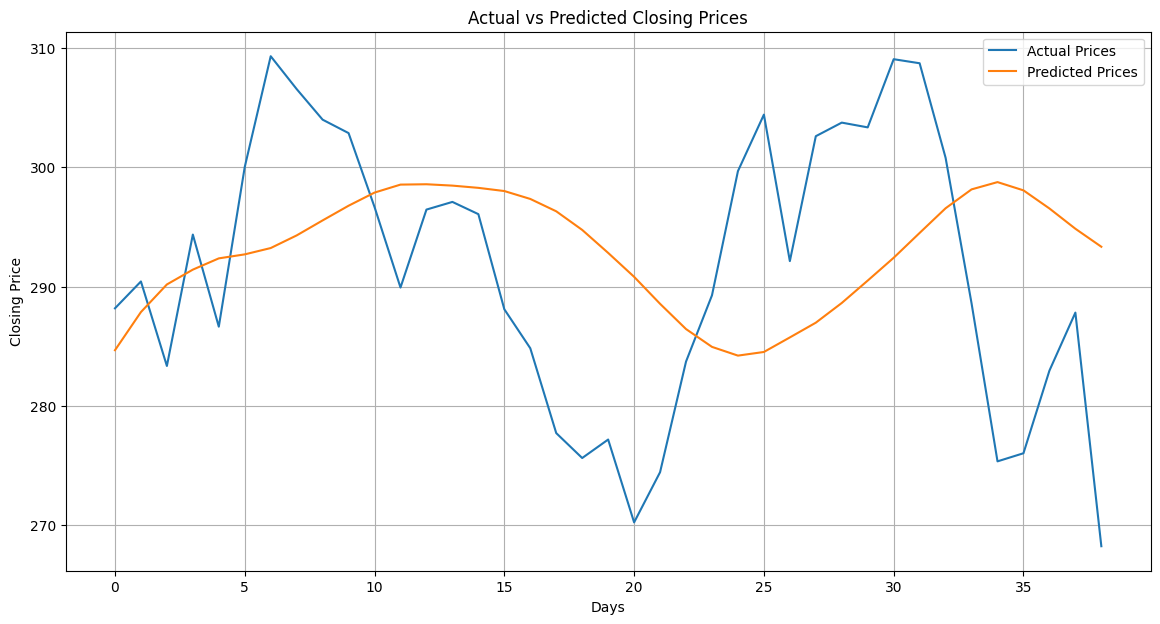

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def calculate_metrics(y_true, y_pred, threshold=0.05):
    # Convert y_true and y_pred to 1D arrays if they are 2D
    y_true = y_true.flatten()  # Convert to 1D
    y_pred = y_pred.flatten()  # Convert to 1D

    # Calculate "accuracy"
    accurate_predictions = np.abs(y_true - y_pred) <= y_true * threshold
    accuracy = np.mean(accurate_predictions)

    # Calculate directions
    actual_directions = np.sign(np.diff(y_true, prepend=y_true[0]))
    predicted_directions = np.sign(np.diff(y_pred, prepend=y_pred[0]))

    # Precision and Recall
    true_positives = (predicted_directions == 1) & (actual_directions == 1)
    false_positives = (predicted_directions == 1) & (actual_directions != 1)
    false_negatives = (predicted_directions != 1) & (actual_directions == 1)

    precision = np.sum(true_positives) / (np.sum(true_positives) + np.sum(false_positives))
    recall = np.sum(true_positives) / (np.sum(true_positives) + np.sum(false_negatives))

    return accuracy, precision, recall

# Calculate metrics
accuracy, precision, recall = calculate_metrics(actual_prices, predicted_prices)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6666666666666666
Precision: 0.4090909090909091
Recall: 0.5
